# Derivatives refresher

In calculus, we often want to find the slope of a curve at a specific point, not just the slope of a straight line. Derivatives are a way of finding **the instantaneous rate of change** or **the slope** of a function at any point.

A derivative in calculus is a measure of how a function changes as its input changes. It's like the speedometer of a car; it tells you how fast you're going at any point in time. In mathematical terms, the derivative of a function at a certain point is the slope of the line tangent to the function at that point.

In the context of a graph, the tangent line at a point on a curve gives us a good approximation of the curve near the point. This is because the tangent line and the curve have the same slope at that point, so they are "heading in the same direction".

The slope of a tangent line is given by the derivative of the function at that point. This effectively measures how the function changes at that point.

The idea behind a derivative of `f(x)`: you would take a very small difference in `x` and divide it by the corresponding difference in `y` to get the slope of the function at that point. By making the difference in `x` smaller and smaller, you can get a more accurate slope.

The derivative of a function is often written as `f'(x)`, or `df/dx`. Both notations mean the same thing: the derivative of `f` with respect to `x`.

In [1]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np

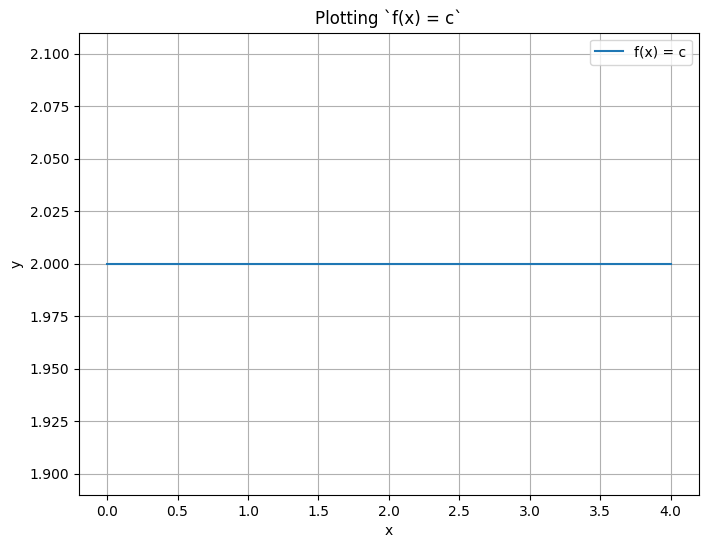

In [4]:
# let's illustrate our first derivatives rule: the constant rule
# e.g.: the derivative of a constant is 0

some_constant = 2
def derivative_constant_rule(x):
    # `np.full_like(x, some_constant)` creates a new array with the same shape and data type as the `x` array,
    # and fills it with the value `some_constant`,
    # this is useful for creating an array of constants with the same shape as another array
    return np.full_like(x, some_constant)

# Create an array of x values
x = np.linspace(0, 4)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, derivative_constant_rule(x), label="f(x) = c")
plt.legend()
plt.grid(True)
plt.title("Plotting `f(x) = c`")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# as you can see in the graph below, the derivative of a constant is 0